# 1. Understanding the problem

## 1.1 Problem description

- The problem statement is based on a dataset with collection of financial transactions pertaining products sold through Amazon.

## 1.2 Objective

- The goal is to build a recommendation system which suggests items based on purchases made, modeling around the dataset.

# 2. Working on the dataset

## 2.1 Analyzing the feature-set

In [1]:
import pandas as pd
df = pd.read_json('gs://sap_assessment/data.json')

In [2]:
print("Dimensions of the dataframe",df.shape)
df.head(5)

Dimensions of the dataframe (83294, 11)


,category,description,title,also_buy,brand,rank,main_cat,date,price,asin,imageURL
0,"[Grocery & Gourmet Food, Cooking & Baking, Sug...","[Shipped from UK, please allow 10 to 21 busine...",Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,"315,867 in Grocery & Gourmet Food (",Grocery,,,0853347867,[https://images-na.ssl-images-amazon.com/image...
1,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[Lipton Yellow Label Tea use only the finest t...,Lipton Yellow Label Tea (loose tea) - 450g,"[B00886E4K0, B00CREXSHY, B001QTRGAQ, B002EYZM4...",Lipton,"30,937 in Grocery & Gourmet Food (",Grocery,,$12.46,4639725043,[https://images-na.ssl-images-amazon.com/image...
2,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[Lipton Yellow Label Teabags uses a new way to...,Lipton Yellow Label Finest Blend Tea Bags 100 ...,"[B000JSQDK4, B007ZI1SKG, 4639725043, B00KPFHOP...",Lipton,"15,487 in Grocery & Gourmet Food (",Grocery,,$12.98,4639725183,[https://images-na.ssl-images-amazon.com/image...
3,"[Grocery & Gourmet Food, Canned, Jarred & Pack...",[Dishes cooked with nutrela are very tasty and...,Nutrela High Protein Soya Chunks 200g (Pack of 6),"[B002FBD900, B00015YTS8, B00B3ARYDC, B002DMUIE...",Nutrela,"195,125 in Grocery & Gourmet Food (",Grocery,,$24.99,5236363640,[]
4,"[Grocery & Gourmet Food, Beverages, Coffee, Te...","[20 Sachets, Empty contents into cup\nPour 8oz...",Organo Gold Cafe Supreme 100% Certified Ganode...,"[B00F3XJX6G, B003CY45VG, B003CGJAIM, B00E1C3FJ...",Organo Gold,"89,943 in Grocery & Gourmet Food (",Grocery,,$29.90,5463213682,[https://images-na.ssl-images-amazon.com/image...


- My first instinct on looking at the first few values of the dataframe was to find thhe identifying feature
- I looked at "asin" as it seemed to be a numeric identifier,i was wondering if it had something to do with a naming convention so looking it up on the web, I found it to be amazon's identification number for its products, which is a 10-character alphanumeric value

In [3]:
#Checking for NA values and if it contains duplicates
print("NA values", df["asin"].isna().sum())
print("Duplicates :", df["asin"].count() - df["asin"].nunique())

NA values 0
Duplicates : 1024


In [4]:
#Checking for NA values for all features
df.isna().sum()

category       0
description    0
title          0
also_buy       0
brand          0
rank           0
main_cat       0
date           0
price          0
asin           0
imageURL       0
dtype: int64

In [5]:
df.count()

category       83294
description    83294
title          83294
also_buy       83294
brand          83294
rank           83294
main_cat       83294
date           83294
price          83294
asin           83294
imageURL       83294
dtype: int64

- I then explored the categories, looking for distribution of values

In [6]:
print("Unique values")
print("Title", df["title"].nunique())
print("Brand", df["brand"].nunique())
print("Main Category", df["main_cat"].nunique())

Unique values
Title 81453
Brand 15325
Main Category 27


In [7]:
df.groupby("brand")["brand"].value_counts().to_frame('count').sort_values('count',ascending=False)

#There seems to be a blank value for the most common brand, I ignore this for now as brand doesn't seem to be significant

,,count
brand,brand,
,,827
Frontier,Frontier,402
Bob's Red Mill,Bob's Red Mill,399
Trader Joe's,Trader Joe's,395
Starbucks,Starbucks,383
...,...,...
Jones Brothers Coffee,Jones Brothers Coffee,1
Jonga Vision,Jonga Vision,1
Jordan,Jordan,1


## 2.2 Identifying key features

- In building the model I will need the identifying feature which is "asin"
- "also_buy" is pivotal as the recommendation model will be centered on products bought together
- "I presume the ranks of each product and their main category could be weighed in when deciding on recommending a product, especially when there is a deadlock between multiple similar products

*Looking at also_buy*

In [8]:
type(df["also_buy"][0])

list

In [9]:
df["also_buy"][0]

['B01898YHXK',
 'B01BCM6LAC',
 'B00Q4OL47O',
 'B00Q4OL5QE',
 '0804189986',
 'B00Q4OL2F8',
 '1101902663',
 'B019PDEUU8',
 'B01AC97ONO',
 'B01LZIS4VX',
 'B019QN2DN8',
 'B019PDYP7Q',
 '1101902639',
 'B00Q4OL0S2',
 'B019PHEIVA',
 'B019QNGPSW',
 'B0041RGD0E',
 '0998089508',
 '0988775115',
 'B0006Z7NNG',
 'B00MU73UKS',
 'B01KIJ7JGA',
 'B005F9W9JQ']

- "also_buy" seems to have the list of asins of all the purchases made besides the product with the asin at that instance

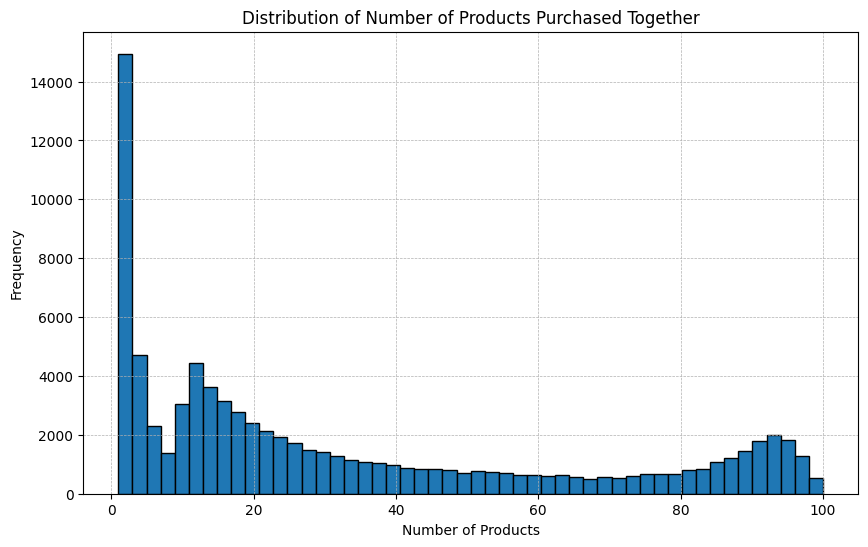

In [10]:
import matplotlib.pyplot as plt


# The number of products purchased together for each transaction
num_products_purchased_together = [len(df['also_buy'][i]) for i in range(df["also_buy"].count())]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(num_products_purchased_together, bins=50, edgecolor='black')
plt.title('Distribution of Number of Products Purchased Together')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

- All transactions seem to involve a small number of products being purchased except a few

- Investigating "main_cat"

In [11]:
df.groupby("main_cat")["main_cat"].value_counts().to_frame('count').sort_values('count',ascending=False)

#Pitfall #1 - incorrect category values for some instances

,,count
main_cat,main_cat,
Grocery,Grocery,75627
Health & Personal Care,Health & Personal Care,3180
Amazon Home,Amazon Home,2486
,,358
All Beauty,All Beauty,345
Toys & Games,Toys & Games,330
Industrial & Scientific,Industrial & Scientific,308
Office Products,Office Products,260
Sports & Outdoors,Sports & Outdoors,182


- Checking on rank

In [12]:
df['rank_len'] = df['rank'].str.len()
df.groupby("rank_len").size().sort_values(ascending=False)

#Pitfall #2 - Will need to see why there is such variance in rank lengths

rank_len
35    42605
34    24819
0      5743
2      2853
33     2544
31     2398
30      961
1       312
3       270
37      245
4       191
36      134
29      124
25       27
28       21
27       19
32       12
24        9
23        3
26        1
19        1
17        1
38        1
dtype: int64

## 2.3 Addressing the pitfalls ( Data pre-processing )

### Main category values

In [13]:
df.groupby("main_cat")["main_cat"].value_counts().to_frame('count').sort_values('count',ascending=False)

#Pitfall #1 - incorrect category values for some instances

,,count
main_cat,main_cat,
Grocery,Grocery,75627
Health & Personal Care,Health & Personal Care,3180
Amazon Home,Amazon Home,2486
,,358
All Beauty,All Beauty,345
Toys & Games,Toys & Games,330
Industrial & Scientific,Industrial & Scientific,308
Office Products,Office Products,260
Sports & Outdoors,Sports & Outdoors,182


*Filtering and replacing the outliers(calculated through string size) based on the median main category value = "Grocery"*

In [14]:
df['main_cat_size'] = df['main_cat'].str.len()
df.groupby('main_cat_size')['main_cat_size'].value_counts().to_frame('count').sort_values('count')

,,count
main_cat_size,main_cat_size,
8,8,1
155,155,1
169,169,1
20,20,1
14,14,2
190,190,3
9,9,3
25,25,17
24,24,17


In [15]:

Q1 = df['main_cat_size'].quantile(0.25)
Q3 = df['main_cat_size'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['main_cat_size'] == 0) | (df['main_cat_size'] > 50)]

outliers.count()


category         408
description      408
title            408
also_buy         408
brand            408
rank             408
main_cat         408
date             408
price            408
asin             408
imageURL         408
rank_len         408
main_cat_size    408
dtype: int64

In [16]:
outlier_index = outliers.index
outlier_index

type(outlier_index)


df.loc[outlier_index,'main_cat'] = "Grocery"

In [17]:
df.groupby("main_cat")["main_cat"].value_counts().to_frame('count').sort_values('count',ascending=False)

,,count
main_cat,main_cat,
Grocery,Grocery,76035
Health & Personal Care,Health & Personal Care,3180
Amazon Home,Amazon Home,2486
All Beauty,All Beauty,345
Toys & Games,Toys & Games,330
Industrial & Scientific,Industrial & Scientific,308
Office Products,Office Products,260
Sports & Outdoors,Sports & Outdoors,182
"Arts, Crafts & Sewing","Arts, Crafts & Sewing",47


### Rank values

*Normalizing the rank through min-max scaling*

- Here I found there were some incorrect/missing values which I replaced with the median value

In [18]:
df[['rank_num','rank_cat']] = df['rank'].str.split(" in ", expand = True)

In [19]:
df['rank_num'] = df['rank_num'].str.replace(',', '').astype(float)

In [20]:
df.groupby('rank_cat')['rank_num'].aggregate(['min','max','count'])

,min,max,count
rank_cat,,,
Amazon Launchpad (,4631.0,4631.0,1
Baby (,197373.0,197373.0,1
Beauty & Personal Care (,8566.0,2619012.0,300
CDs & Vinyl (,446205.0,446205.0,1
"Clothing, Shoes & Jewelry (",173111.0,173111.0,1
Grocery & Gourmet Food (,4.0,1506205.0,70020
Health & Household (,180.0,2397987.0,3138
Industrial & Scientific (,403.0,604042.0,230
Movies & TV (,192506.0,192506.0,1


In [21]:
df['rank_size'] = df['rank'].str.len()

In [22]:
rank_blank_index = df.query("rank_size == 0").index
rank_blank_index
rank_non_in_index = df.query("rank_size > 0  and rank_size < 6").index
rank_non_in_index

Int64Index([   16,    17,    19,    20,    32,    33,    34,    36,    38,
               50,
            ...
            83121, 83187, 83202, 83204, 83205, 83206, 83207, 83231, 83280,
            83282],
           dtype='int64', length=3626)

In [23]:
rank_median = df["rank_num"].median()
rank_median

145218.0

In [24]:
df.loc[rank_blank_index,'rank_num'] = rank_median
df.loc[rank_non_in_index,'rank_num'] = rank_median

In [25]:
df.groupby('main_cat')['rank_num'].aggregate(['min','max','count'])

,min,max,count
main_cat,,,
All Beauty,8566.0,2619012.0,345
All Electronics,145218.0,145218.0,7
Amazon Home,1468.0,485683.0,2486
"Arts, Crafts & Sewing",145218.0,145218.0,47
Automotive,145218.0,145218.0,2
Baby,145218.0,145218.0,41
Camera & Photo,145218.0,145218.0,2
Car Electronics,145218.0,145218.0,1
Cell Phones & Accessories,111748.0,145218.0,17


- Normalizing the rank with min-max scaling

In [26]:
grouper = df.groupby('main_cat')['rank_num']
maxes = grouper.transform('max')
mins = grouper.transform('min')

In [27]:
maxes[maxes==mins] = mins[maxes==mins]+1

In [28]:
df = df.assign(norm_rank= (1 - (df.rank_num - mins)/(maxes - mins)))
df['norm_rank'].count()

83294

In [29]:
df.groupby('main_cat')['norm_rank'].aggregate(['min','max','count'])

,min,max,count
main_cat,,,
All Beauty,0.0,1.0,345
All Electronics,1.0,1.0,7
Amazon Home,0.0,1.0,2486
"Arts, Crafts & Sewing",1.0,1.0,47
Automotive,1.0,1.0,2
Baby,1.0,1.0,41
Camera & Photo,1.0,1.0,2
Car Electronics,1.0,1.0,1
Cell Phones & Accessories,0.0,1.0,17


# 3. Building the model

## 3.1 Weighing up options

### 3.1.1 Itemset mining (initial thoughts)

- Looking at the "also_buy" feature instances at first, each of which had a sequence with list of products made me think of Itemset mining

- The apriori algorithm came to mind, after a brief review on Python's libraries implementing this model, Apyori seemed to be the right choice

- At this point, I was certain on my conjecture of having rank to be of influence while building the model, so I decided to weigh-up other options

### 3.1.2 Item-item collaboarative filtering

- I've studied collaborative filtering briefly, to have a item-item matrix with the matrix-values being the normalized-ranks of the products was my next thought, which I decided to pursue

- I would need a m x n matrix with the rows representing each of the "asin" values and the columns representing all the products purchased which is the exhaustive list of unique "asin" values of the products in all instances of "also_buy"

In [30]:
ab_list = df["also_buy"].tolist()
ab_set = set()
for i in ab_list:
    for j in i:
        ab_set.add(j)
len(ab_set)

293034

- The dataset does not seem to have the information of all the products present in the dataframe, which wouldn't change my perspective of building the matrix but certainly is a pitfall when displaying the output which I conceptualized to be consisting of details of the recommended products

In [31]:
selected_transactions = df["also_buy"]
len(selected_transactions)

83294

- At this point, I tried constructing a dataframe but it was computationally expensive to have a dataframe so I opted for a numpy array which would eliminate the need for having columns but then to numerically index them, there needs to be a mapping for column names (asins from also_buy) to indices

In [32]:
asin_to_index = {asin: idx for idx, asin in enumerate(set(item for sublist in selected_transactions for item in sublist))}


In [33]:
len(asin_to_index)

293034

## 3.2 Tailoring the dataframe for modeling

## 3.2.1 Constructing a sparse matrix

- Here, I decided to use the Alternating Least Squares recommender from the implicit module.
- This takes a sparse matrix with userxitem dimension with matrix values being confidence level of the item that was bought, which here, I conceptualized to be the normalized rank of the product
- However, this was too computationally expensive and my Google Cloud Colab notebook always crashed (free tier, so couldn't upscale), I tried working on how I could limit computation, but couldn't think of an approach in time.

- I had done the following, before abandoning at the last step
1. Constructed a square matrix and that made me remove the missing asin values from also_buy that did not corresponded with the instances in the dataset.
2. Assigned the normalized rank to each transaction's list of products
3. Ran the matrix through the ALS model which returned NA values for recomendations, after debugging I found that the values in "data" from the following section's commented code couldn't get any values and crashed mid-execution


- So instead, I decided to use Singular Value Decomposition for dimensionality reduction of the matrix and checking for maximum values for top recommendations

In [34]:
# rows = []
# cols = []
# data = []
# for user_idx, transaction in enumerate(selected_transactions):
#     for product in transaction:
#           if product in df["asin"]:
#                 rows.append(user_idx)
#                 cols.append(asin_to_index[product])
#                 data.append(df.query("asin == @product")["norm_rank"])

rows = []
cols = []
data = []
for user_idx, transaction in enumerate(selected_transactions):
    for product in transaction:
          rows.append(user_idx)
          cols.append(asin_to_index[product])
          data.append(1)

In [35]:
import numpy as np

dense_matrix = np.zeros((len(selected_transactions), len(asin_to_index)))

In [36]:
for i, j, value in zip(rows, cols, data):
    dense_matrix[i, j] = value

In [37]:
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(dense_matrix)

sparse_matrix.shape

(83294, 293034)

### 3.2.2 - Truncated SVD

[Visual representation of the Matrix factorization approach used by SVD](https://developers.google.com/machine-learning/recommendation/images/Matrixfactor.svg)

In [38]:
# % pip install implicit
# from implicit.als import AlternatingLeastSquares

# model = AlternatingLeastSquares(factors=128, regularization=0.10, alpha=2.0)
# model.fit(sparse_matrix)
# asin_id_als = ""
# ids, scores = model.recommend(asin_id_als, sparse_matrix[asin_id_als], N=10, filter_already_liked_items=False)


from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD for matrix factorization
n_components = 100  # Number of latent factors
svd_model = TruncatedSVD(n_components=n_components, random_state=73)
user_matrix = svd_model.fit_transform(sparse_matrix)
item_matrix = svd_model.components_

user_matrix.shape, item_matrix.shape


((83294, 100), (100, 293034))

- Here I tried a bunch of latent factor values and decided on '100' based on the recommendatios I was getting by mapping the product in general, by seeing if they made sense

- I would prefer an actual statistical evaluation metric like AUC(area under the curve) and I have stated my findings/limitations in the future scope section

# 4. Evaluating the model's results

In [39]:
def get_svd_top_n_recommendations(item_idx, user_matrix, item_matrix, n=10):
    """
    Get top N recommended products for a given product based on its latent factors using TruncatedSVD results.

    Parameters:
        - item_idx: Index of the item for which recommendations are required.
        - user_matrix: Latent factors of users.
        - item_matrix: Latent factors of items.
        - n: Number of top recommended products.

    Returns:
        - List of top N recommended product indices.
    """
    scores = user_matrix @ item_matrix[:, item_idx] #Scores of each item corresponding to the passed asin
    top_n_items = scores.argsort()[::-1][:n+1]  # +1 to exclude the item itself
    recommended_items = [item for item in top_n_items if item != item_idx][:n]
    return recommended_items



In [40]:
asin_svd = "B00CREXSHY" #Input product asin here

if asin_svd in asin_to_index:
    item_idx_svd = asin_to_index[asin_svd]
    recommended_item_indices_svd = get_svd_top_n_recommendations(item_idx_svd, user_matrix, item_matrix)
    recommended_asins_for_svd = [list(asin_to_index.keys())[list(asin_to_index.values()).index(idx)] for idx in recommended_item_indices_svd]
else:
    recommended_asins_for_svd = []

recommended_asins_for_svd

['B00O6801CE',
 'B00NN4541U',
 'B00018H5VS',
 'B013ZTYLOS',
 'B00O7QZAZ8',
 'B01AVBIWRK',
 'B00E0QAS34',
 'B00U865L00',
 'B00RBABVRS',
 'B008OS5Z6E']

In [41]:
titles = []

for i in recommended_asins_for_svd:
  try:
    titles.append(df.query("asin == @i")['title'])
  except Error:
    titles.append("Title not found")

In [42]:
titles

#There are products that have missing titles because the dataset doesn't have the exhaustive list of all asin instances found in "also_buy"

[Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 512     Koeze's Colossal Cashews - 30 oz. Decanter
 1536    Koeze's Colossal Cashews - 30 oz. Decanter
 Name: title, dtype: object,
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 29673    Hello Kitty Sours, Pack of 3
 Name: title, dtype: object]

In [43]:
df.query("asin == @asin_svd")


,category,description,title,also_buy,brand,rank,main_cat,date,price,asin,imageURL,rank_len,main_cat_size,rank_num,rank_cat,rank_size,norm_rank


# 5. Future scope

- If I could get through the computation bottleneck, I would debug and get the model trained with Alternating Least Squares model which takes into consideration the rating/ranking of the product while recommending

- The ALS model also leverages the list of products already bought together while training the model

- I could have evaluation metrics such as AUC if I have a model like ALS




# 6. Conclusion and final thoughts

- I would certainly have tried to implement a more sophisticated learning model like ALS permitting computational power and time, but I appreciate this opportunity to work on this challenging problem which I thoroughly enjoyed working on.

## Thank you!